<a href="https://colab.research.google.com/github/haalfasyi/Campstone-husnul/blob/main/Capstone_Module_2_Husnul_Adib_Alfastyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang
TSA (Transportation Security Administration) menilai telah banyak terjadi claim yang merugikan airlines atas insiden-insiden yang terjadi kepada penumpang. Untuk mengurangi jumlah claim dan meningkatkan pelayanan, TSA butuh untuk menemukan solusi yang tepat dalam mengalokasikan keamanan lebih di sektor yang benar,:

# Pernyataan Masalah

Untuk memperbaiki dan meningkatkan layanan melalui data yang dimiliki, TSA (Transportation Security Administration ) butuh untuk melihat dan memperhitungkan maskapai mana yang memiliki insiden terbanyak, dan apa jenis insiden yang sering terjadi. Mereka juga perlu untuk melihat di mana insiden-insiden tersebut terjadi, untuk bisa membuat rekomendasi kepada maskapai dan airport, serta memperketat pengawasan dalam sektor tersebut.

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh TSA

In [183]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset ini berisi informasi terkait Airline, insiden yang terjadi, hingga status claim yang telah diajukan. Ada 13 kolom di dalam dataset tsa_dataset, yaitu:  

* Claim Number: ID unik untuk tiap *claim*
* Date Received: Kapan laporan insiden diterima
* Incident Date: Kapan Insiden terjadi
* Airport Code: *Three Letter Code* unik tiap airport
* Airport Name: Nama Airport tempat terjadinya insiden
* Claim Type: Tipe insiden yang terjadi hingga mengakibatkan *claim*
* Claim Site: Lokasi terjadinya insiden
* Item: Jenis barang yang mengalami kerugian
* Claim Amount: Jumlah *claim* yang diajukan
* Status : Kondisi claim yang diajukan
* Close Amount: Jumlah *claim* yang diberikan
* Disposition: Penjelasan mengenai hasil claim

Berikut 10 baris teratas dan terbawah dari dataset tsa_claims.

In [184]:
data_klaim = pd.read_csv('/content/drive/MyDrive/haa/tsa_claims.csv')
display(data_klaim.head(10),data_klaim.tail(10))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,$459.01,Settled,$227.00,Settle
6,2007050124750,30-Apr-02,4/26/2007 0:00,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,$106.52,Approved,$106.52,Approve in Full
7,12772,20-Jun-02,5/9/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
8,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
9,2004102965797,25-Jun-02,5/4/2002 0:00,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204257,2015112027025,6-Nov-15,14-Sep-15,-,-,-,-,Checkpoint,Currency,-,-,NaN,NaN
204258,2015121527555,10-Nov-15,10-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Travel Accessories,-,-,NaN,NaN
204259,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
204260,2015120827394,17-Nov-15,8-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Jewelry & Watches,-,-,NaN,NaN
204261,2015121427528,17-Nov-15,1-Nov-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing; Household Items,-,-,NaN,NaN
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


# Data Understanding and Cleansing

Mengingat data memiliki beberapa anomali yang harus diperbaiki, maka kita mulai melakukan data cleansing.
Untuk permulaan, kita akan menyamakan format tanggal.

In [185]:
#data_klaim['Date Received'] = pd.to_datetime(data_klaim['Date Received'], format='%d-%b-%y')
data_klaim['Date Received'] =(pd.to_datetime(data_klaim['Date Received'], errors='coerce', dayfirst=True).dt.strftime('%Y-%m-%d'))
data_klaim['Date Received'] = pd.to_datetime(data_klaim['Date Received'], format='%Y-%m-%d')
data_klaim.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


Data pada Date Received memiliki format YYYY-MM-DD, sedangkan data pada Incident Date memiliki format MM/DD/YYYY.

In [186]:
#data_klaim['Incident Date'] = pd.to_datetime(data_klaim['Incident Date'], format='%m/%d/%Y %H:%M' or '%m/%d/%y %H:%M')

data_klaim['Incident Date']=(pd.to_datetime(data_klaim['Incident Date'], errors='coerce', dayfirst=True).dt.strftime('%Y-%m-%d'))
data_klaim['Incident Date'] = pd.to_datetime(data_klaim['Incident Date'], format='%Y-%m-%d')
data_klaim.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-06-01,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-05-02,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


Data pada kedua kolom disamakan menjadi YYYY-MM-DD

In [187]:
data_klaim['processed_time (day)'] =(data_klaim['Date Received']-data_klaim['Incident Date'] ).dt.days.astype('Int64')
data_klaim.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,processed_time (day)
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full,-342
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle,-713
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle,-660
3,0909816M,2002-02-07,2003-06-01,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-479
4,2005032379513,2002-02-18,2005-05-02,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full,-1169


Sekarang kita lihat jumlah data yang ada di dalam tsa_claims

In [188]:
data_klaim = data_klaim.reindex(['Claim Number','Date Received','Incident Date','processed_time (day)','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount', 'Disposition',], axis=1)
data_klaim.head()
print(len(data_klaim))

204267


Data ini kemudian akan kita cleansing utnuk mendapatkan jumlah data yang lebih kecil

In [189]:
data_klaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Claim Number          204267 non-null  object        
 1   Date Received         204004 non-null  datetime64[ns]
 2   Incident Date         201920 non-null  datetime64[ns]
 3   processed_time (day)  201781 non-null  Int64         
 4   Airport Code          195743 non-null  object        
 5   Airport Name          195743 non-null  object        
 6   Airline Name          169893 non-null  object        
 7   Claim Type            196354 non-null  object        
 8   Claim Site            203527 non-null  object        
 9   Item                  200301 non-null  object        
 10  Claim Amount          200224 non-null  object        
 11  Status                204262 non-null  object        
 12  Close Amount          135315 non-null  object        
 13 

In [190]:
print(data_klaim.isnull().sum())
print('jumlah data:', len(data_klaim))

Claim Number                0
Date Received             263
Incident Date            2347
processed_time (day)     2486
Airport Code             8524
Airport Name             8524
Airline Name            34374
Claim Type               7913
Claim Site                740
Item                     3966
Claim Amount             4043
Status                      5
Close Amount            68952
Disposition             72908
dtype: int64
jumlah data: 204267


In [191]:
display(data_klaim.describe(), data_klaim.describe(include='object'))

,processed_time (day)
count,201781.000000
mean,40.463681
std,135.447851
min,-3647.000000
25%,8.000000
50%,23.000000
75%,62.000000
max,18279.000000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [192]:
count_unique_type = data_klaim.groupby('Claim Type')['Claim Number'].nunique() 
count_unique_airline = data_klaim.groupby('Airline Name')['Claim Number'].nunique() 
count_unique_status = data_klaim.groupby('Status')['Claim Number'].nunique()  
count_unique_ = data_klaim.groupby('Airline Name')['Claim Number', 'Status'].nunique() 
display(count_unique_type,'----------------------------------------------' ,count_unique_airline,'----------------------------------------------',count_unique_status)

<ipython-input-192-5fedf2ef50f7>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_unique_ = data_klaim.groupby('Airline Name')['Claim Number', 'Status'].nunique()


Claim Type
-                             282
Bus Terminal                    1
Complaint                      48
Compliment                      3
Employee Loss (MPCECA)        485
Motor Vehicle                 368
Passenger Property Loss    117868
Passenger Theft               465
Personal Injury              1458
Property Damage             75363
Wrongful Death                  4
Name: Claim Number, dtype: int64

'----------------------------------------------'

Airline Name
-                         4243
ATA Aerocondor             328
Aer Lingus                 110
Aero California              3
Aero Costa Rica              1
                          ... 
Westjet Airlines Ltd       189
Wiggins Airways              1
XL Airways                   3
Xtra Airways                 8
vivaAerobus                  1
Name: Claim Number, Length: 318, dtype: int64

'----------------------------------------------'

Status
-                                                                                                                                12749
Approve in Full                                                                                                                  12364
Approved                                                                                                                         34999
Canceled                                                                                                                          7017
Claim entered                                                                                                                       14
Claim has been assigned for further investigation                                                                                    1
Closed as a contractor claim                                                                                                      1315
Denied                                          

In [193]:
data_klaim.dropna(thresh=5, inplace=True)

In [194]:
print(data_klaim.isnull().sum().sort_values(ascending=False))
print('jumlah data:', len(data_klaim))

Disposition             72755
Close Amount            68882
Airline Name            34216
Airport Code             8366
Airport Name             8366
Claim Type               7755
Claim Amount             3889
Item                     3820
processed_time (day)     2328
Incident Date            2203
Claim Site                591
Date Received             135
Claim Number                0
Status                      0
dtype: int64
jumlah data: 204109


Setelah dilakukan data cleansing, kita bisa melihat bahwa:

1.   Jumlah data yang tersisa adalah 204109 baris
2.   Kolom yang terisi paling sedikit adalah disposition sebanyak 72755 kolom kosong
3.   Kolom Claim Number dan status terisi penuh





#Data Analysis

Mengingat bahwa analisis ini berfokus kepada insiden dan claim, Kita akan melihat garis besar terjadinya insiden dan claim, serta maskapai dan lokasi dimana insiden terjadi.

1. **Which Incident occurs the most according to the data**

In [195]:
data_klaim['Claim Type'] = data_klaim['Claim Type'].str.replace('-','Undefined Type')

data_klaim_type= data_klaim['Claim Type'].value_counts()
x_label = data_klaim_type.index
y_label = data_klaim_type.values

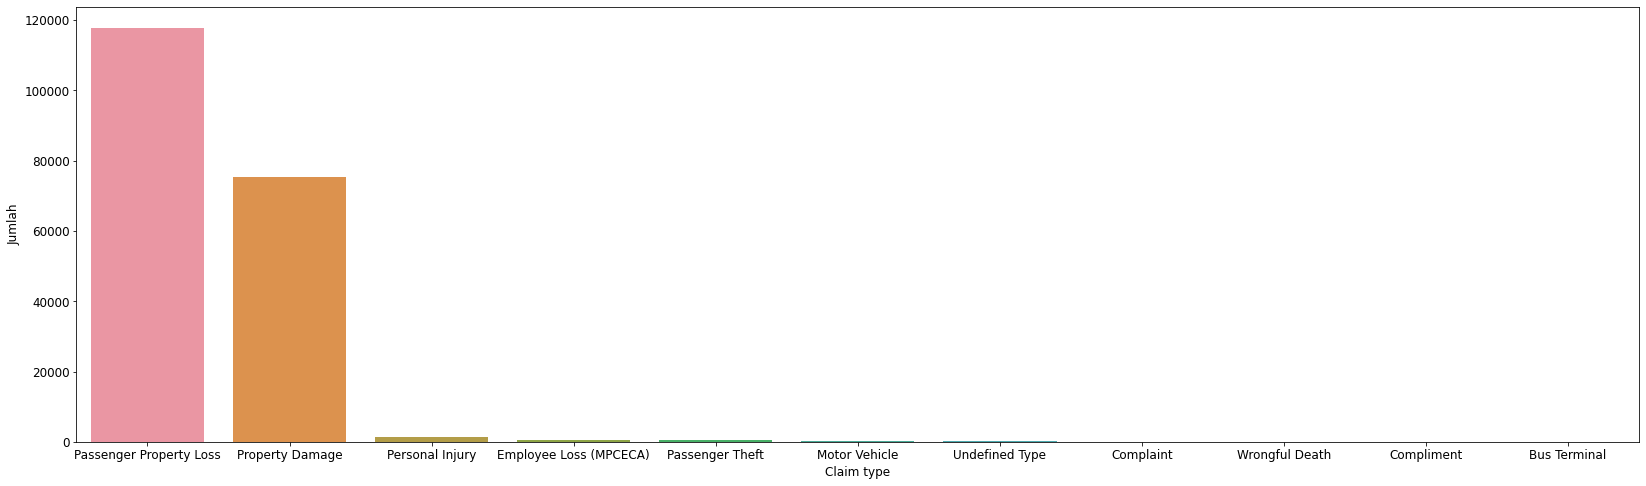

Banyaknya jenis klaim: 11
Jenis klaim yang banyak terjadi : Passenger Property Loss
Jumlah jenis klaim berupa: Passenger Property Loss ; terjadi sebanyak 117868


In [196]:
plt.figure(figsize=(28,8))
sns.barplot(x=x_label, y=y_label, orient='vertical')
plt.xlabel('Claim type', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Banyaknya jenis klaim:', len(data_klaim_type))
print('Jenis klaim yang banyak terjadi :', data_klaim_type.index[data_klaim_type.values == data_klaim_type.values.max()].tolist()[0])
print('Jumlah jenis klaim berupa:',  data_klaim_type.index[data_klaim_type.values == data_klaim_type.values.max()].tolist()[0], '; terjadi sebanyak', data_klaim_type.values.max())

Dari grafik di atas, terdaoat 11 jenis insiden yang tercatat, dimana kehilangan barang merupakan insiden yang paling banyak terjadi, sebanyak 117868 kasus telah terjadi. Kerusakan barang juga memilkiki jumlah yang signifikan, terpaut cukup jauh dari jenis insiden yang lain.

**2. Where does Incidents occur more frequently according to the data**

In [197]:
data_klaim_airport= data_klaim['Airport Code'].value_counts()
print('Lokasi Airport dengan jumlah klaim terbanyak : ', data_klaim_airport.index[data_klaim_airport.values == data_klaim_airport.values.max()].tolist()[0],'-',list(data_klaim['Airport Name'][data_klaim['Airport Code'] ==data_klaim_airport.index[data_klaim_airport.values == data_klaim_airport.values.max()].tolist()[0]])[0])
print('Jumlah Laporan yang terjadi: ', data_klaim_airport.max())
print('--------------------------------------------------------------------')
print('Lokasi Airport dengan jumlah klaim paling sedikit : ', data_klaim_airport.index[data_klaim_airport.values == data_klaim_airport.values.min()].tolist()[0],'-',list(data_klaim['Airport Name'][data_klaim['Airport Code'] ==data_klaim_airport.index[data_klaim_airport.values == data_klaim_airport.values.min()].tolist()[0]])[0])
print('Jumlah Laporan yang terjadi: ', data_klaim_airport.min())

Lokasi Airport dengan jumlah klaim terbanyak :  LAX - Los Angeles International Airport
Jumlah Laporan yang terjadi:  9596
--------------------------------------------------------------------
Lokasi Airport dengan jumlah klaim paling sedikit :  CEZ - Cortez Municipal
Jumlah Laporan yang terjadi:  1


Berdasarkan grafik di atas, terlihat bahwa insiden terjadi paling sering di Los Angeles International Airport, dengan jumlah kasus sebanyak 9596.

**3. What kind of incidents that the claim most likely to be approved**

Berhubung jumlah kategori tersendiri dalam kolom claim status terlalu banyak, maka kita akan mengelompokkan beberapa kategori menjadi satu jenis.
Beberapa kategori akan kita ubah menjadi "On Process" dan "Unknown Report"

In [198]:
data_klaim['Status'].unique()

array(['Approved', 'Settled', 'Canceled', 'Denied',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'In litigation', 'Closed as a contractor claim', 'In review',
       'Claim has been assigned for further investigation',
       'Pending response from claimant', 'Deny', '-', 'Settle',
       'Approve in Full'], dtype=object)

In [199]:
claim_status_fix = ['Approved', 
                    'Settled', 
                    'Canceled', 
                    'Denied',
                    'On Process',
                    'Unknown Report'
                    'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
                    'In litigation', 
                    'Closed as a contractor claim',
                    'In review',
                    'Claim has been assigned for further investigation',
                    'Pending response from claimant',
                    'Deny',
                    '-', 
                    'Settle',
                    'Approve in Full']

data_klaim = data_klaim[data_klaim.Status.isin(claim_status_fix )]
data_klaim.Status.replace('Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.','On process',inplace=True)
data_klaim.Status.replace( 'In litigation','On process',inplace=True)
data_klaim.Status.replace(  'Closed as a contractor claim','Denied',inplace=True)
data_klaim.Status.replace( 'In review','On process',inplace=True)
data_klaim.Status.replace(  'Claim has been assigned for further investigation','On process',inplace=True)
data_klaim.Status.replace( 'Pending response from claimant','On process',inplace=True)
data_klaim.Status.replace( 'Deny','Denied',inplace=True)
data_klaim.Status.replace( '-','Unknown Report',inplace=True)
data_klaim.Status.replace( 'Settle','Settled',inplace=True)
data_klaim.Status.replace( 'Approve in Full','Approved',inplace=True)
#df.Status.replace("Deny","Denied",inplace=True)
#df.Status.replace("Settle","Settled",inplace=True)

print(data_klaim.Status.value_counts())
print(len(data_klaim))


Denied            97889
Approved          47361
Settled           33722
Unknown Report    12752
Canceled           6917
On process          119
Name: Status, dtype: int64
198760


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


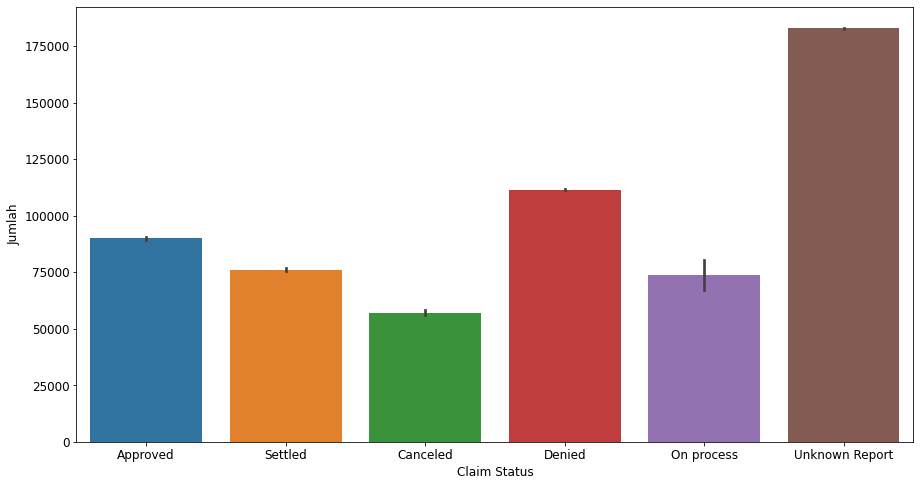

In [200]:
y_label =  data_klaim['Status'].index
x_label =  data_klaim['Status'].values

plt.figure(figsize=(15,8))
sns.barplot(x=x_label, y=y_label, orient='vertical')
plt.xlabel('Claim Status', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [201]:
print("Jenis Klaim yang banyak di-Approve : ", list(data_klaim['Claim Type'][data_klaim['Status'] =='Approved'])[0])
print("Jenis Klaim yang banyak di-Deny : ", list(data_klaim['Claim Type'][data_klaim['Status'] =='Denied'])[0])

Jenis Klaim yang banyak di-Approve :  Property Damage
Jenis Klaim yang banyak di-Deny :  Passenger Property Loss


In [202]:
data_klaim_airline = data_klaim['Airline Name'].value_counts()
hinumber_claim_airlines = data_klaim_airline.index[data_klaim_airline.values == data_klaim_airline.values.max()].tolist()[0]
print("Highest number of claim : ", data_klaim_airline.values.max())
print("Highest Number of Claim - AIrline Name : ",hinumber_claim_airlines)
print('--------------------------------------------------------------------')
hinumber_claim_airlines = data_klaim_airline.index[data_klaim_airline.values == data_klaim_airline.values.min()].tolist()[0]
print("Lowest number of claim : ", data_klaim_airline.values.min())
print("Lowest Number of Claim - AIrline Name : ",hinumber_claim_airlines)

Highest number of claim :  17176
Highest Number of Claim - AIrline Name :  American Airlines
--------------------------------------------------------------------
Lowest number of claim :  1
Lowest Number of Claim - AIrline Name :  Royal Wings Airlines


Berdasarkan grafik di atas, kita bisa melihat bahwa claim yang paling sering ditolak adalah kehilangan barang. Di sini terlihat bahwa ada kesinambungan antara insiden yang paling sering terjadi dengan jumlah status klaim. Sedikit informasi tambahan bahwa klaim terjadi paling sering di maskapai American Airlines

In [203]:
list_airline = pd.crosstab(data_klaim['Airline Name'],data_klaim['Status'])
display(list_airline)

Status,Approved,Canceled,Denied,On process,Settled,Unknown Report
Airline Name,,,,,,
-,1031,0,1389,0,422,1405
ATA Aerocondor,53,10,196,0,62,0
Aer Lingus,20,0,58,0,18,14
Aero California,1,0,1,0,1,0
Aero Costa Rica,0,0,0,0,0,1
...,...,...,...,...,...,...
Westjet Airlines Ltd,52,0,76,0,25,36
Wiggins Airways,0,0,1,0,0,0
XL Airways,0,0,1,0,1,1


In [204]:
count_unique_airline = data_klaim.groupby('Airline Name')['Claim Number'].nunique()
print()

In [207]:
val = (data_klaim['Incident Date'].dt.year.value_counts().sort_index())
print(val)

1996.0        1
2000.0       13
2001.0       15
2002.0     2135
2003.0    23523
2004.0    28299
2005.0    22195
2006.0    18116
2007.0    17772
2008.0    15365
2009.0    10770
2010.0    12214
2011.0    10994
2012.0     9984
2013.0     9536
2014.0     8680
2015.0     7721
Name: Incident Date, dtype: int64


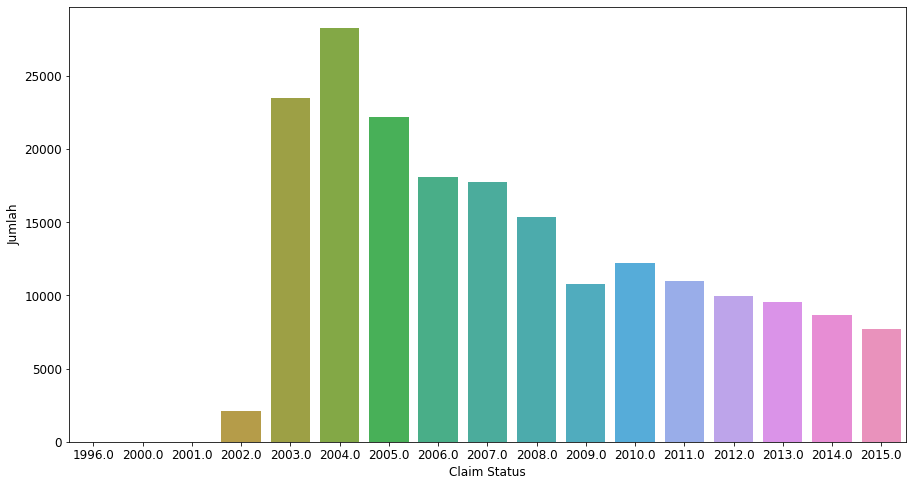

In [210]:
plt.figure(figsize=(15,8))
sns.barplot(x=val.index, y=val.values, orient='vertical')
plt.xlabel('Claim Status', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Kesimpulan dan Rekomendasi

Dari hasil analisis diatas dapat disimpulkan bahwa:
1. Insiden yang paling sering terjadi adalah insiden kehilangan barang sebanyak 117868 kasus

2.  Insiden paling sering terjadi di Los Angeles International Airport sebanyak 9596 kasus

3. Claim yang paling banyak diapprove adalah Kerusakan barang, sedangkan yang paling banyak ditolak adalah kehilangan barang.

4. Maskapai yang paling sering terjadi insiden adalah American Airlines.

Rekomendasi:
1. Pelajari lebih lanjut penyebab kehilangan barang. berdasarkan hasil claim, dimana kehilangan barang menjadi kasus yang paling sering diitolak, hal ini bisa terjadi karena kesalahan mungkin tidak terjadi dari pihak maskapai/airport.

2. Los Angeles International Airport dan American Airlines perlu memperketat pengawasan dan mengevaluasi SOP pengamanan

3. Fokuskan pengawasan lebih terutama terkait kasus kerusakan barang, di mana kasus ini merupakan kasus yang paling sering terjadi claim.

Dengan mempersempit fokus kepada kasus kerusakan dan kehilangan barang, serta evaluasi pada penyelenggaraan keamanan di American Airlines dan Los Angeles International Airport, TSA akan dapat mengurangi jumlah insiden dan claim.

Berikutnya adalah mengonversi data hasil cleansing ke dalam bentuk .csv untuk digunakan dalam visualisasi menggunakan Tableu

In [211]:
data_klaim.to_csv('/content/drive/MyDrive/tsa_claim_cleansed.csv')